In [7]:
from pathlib import Path 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [8]:
folder = Path('./params/N4')
#for f in folder.iterdir():
#    print(f.name.split('C')[-1].rstrip('.dat'))

In [9]:
plot_folder = "plots/data_distribution/N4/"

In [10]:
C_list = []
percent_seg = []
percent_alt = []
eff = []
ineq = []
eff_er = []
ineq_er = []
for f in folder.iterdir():
    C = f.name.split('C')[-1].rstrip('.dat')
    df = pd.read_table(f, sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc'])
    C_list.append(C)
    
    mx = df['inequality'].max()
    mn = 0.98*mx
    df_seg = df[(df['inequality']>mn) & (df['cond_entropy']<0.01) & (df['efficiency']>0.48)]
    percent_seg.append(df_seg.shape[0]/df.shape[0])
    #print(df_seg.head())

    mn = 0.02*mx
    df_alt = df[(df['inequality']<mn) & (df['cond_entropy']<0.01) & (df['efficiency']>0.48)]
    percent_alt.append(df_alt.shape[0]/df.shape[0])
    #print(df_alt.head())

    eff.append(df['efficiency'].mean())
    ineq.append(df['inequality'].mean())
    eff_er.append(df['efficiency'].std())
    ineq_er.append(df['inequality'].std())

df_c = pd.DataFrame({'c':C_list, '%seg':percent_seg, '%alt':percent_alt, 'eff':eff, 'ineq':ineq, 'eff_er':eff_er, 'ineq_er':ineq_er})
df_c.c.astype('float')
df_c.sort_values(by='c',inplace=True)
df_c.head()

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_180275/1556323531.py:10: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_table(f, sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc'])


,c,%seg,%alt,eff,ineq,eff_er,ineq_er
2,0.0,0.093178,0.001664,0.269697,0.307786,0.159537,0.151583
5,0.01,0.001664,0.034942,0.446003,0.288830,0.048947,0.135285
1,0.05,0.000000,0.078203,0.449515,0.258643,0.040633,0.136616
6,0.08,0.000000,0.079867,0.441647,0.236157,0.046587,0.139968
3,0.1,0.000000,0.079867,0.444002,0.219281,0.043827,0.133720


In [11]:
#df_c['c'].iloc[df_c['eff'].argmax()]

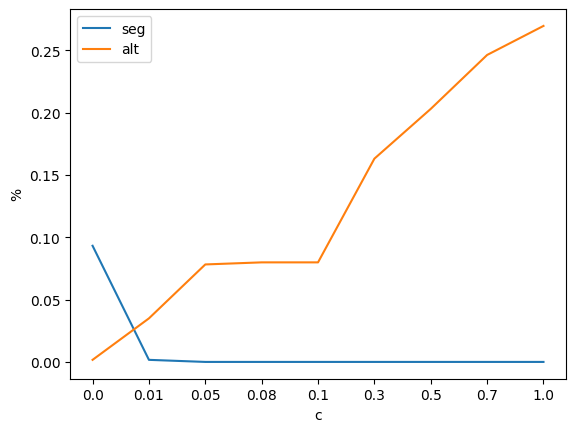

In [12]:
ax = sns.lineplot(x='c',y='%seg',data=df_c,label='seg')
ax.set_ylabel('%')
sns.lineplot(x='c',y='%alt',data=df_c,label='alt')
plt.savefig(plot_folder+'seg_alt_percent.png')

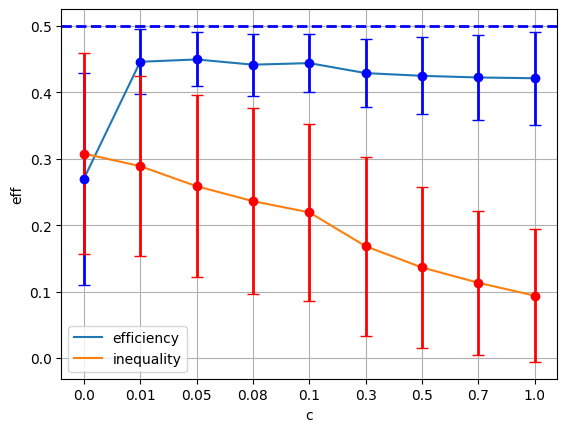

In [13]:
ax = sns.lineplot(x='c',y='eff',data=df_c, label='efficiency')
ax.axhline(y=0.5, color='blue', linestyle='--', linewidth=2)
plt.errorbar(x=df_c['c'], y=df_c['eff'], yerr=df_c["eff_er"], fmt='o', color='blue', ecolor='b', elinewidth=2, capsize=4)
sns.lineplot(x='c',y='ineq',data=df_c, label='inequality')
plt.errorbar(x=df_c['c'], y=df_c['ineq'], yerr=df_c["ineq_er"], fmt='o', color='red', ecolor='r', elinewidth=2, capsize=4)
plt.grid()
plt.savefig(plot_folder+'eff_ineq_vs_C.png')